In [1]:
!pip3 install lets-plot

In [2]:
!pip3 install umap-learn

In [3]:
!pip3 install catboost

Импортируем необходимые библиотеки.

In [45]:
import pandas as pd
import numpy as np
from lets_plot import *
from lets_plot import ggplot, aes, geom_histogram, geom_density, geom_boxplot
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
import warnings

# Подавляем FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
import joblib
import logging

# Предобработка данных.

Чтение данных.

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_PJ_DL/data/train.csv")

In [8]:
df.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

Фильтрация невалидных значений.

In [10]:
df = df.drop('ID',axis=1)

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [13]:
df['age']=df['age'].astype(int)
df['chest']=df['chest'].astype(int)

In [14]:
cat_list = [
  'sex',
  'chest',
  'fasting_blood_sugar',
  'resting_electrocardiographic_results',
  'exercise_induced_angina',
  'slope',
  'number_of_major_vessels',
  'thal'
  ]

df[cat_list] = df[cat_list].astype('object')

In [15]:
num_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   600000 non-null  int64  
 1   sex                                   600000 non-null  object 
 2   chest                                 600000 non-null  object 
 3   resting_blood_pressure                600000 non-null  float64
 4   serum_cholestoral                     600000 non-null  float64
 5   fasting_blood_sugar                   600000 non-null  object 
 6   resting_electrocardiographic_results  600000 non-null  object 
 7   maximum_heart_rate_achieved           600000 non-null  float64
 8   exercise_induced_angina               600000 non-null  object 
 9   oldpeak                               600000 non-null  float64
 10  slope                                 600000 non-null  object 
 11  

Преобразование категориальных переменных в фиктивные переменные.

In [17]:
df_dum = pd.get_dummies(
    df,
    columns=cat_list,
    dtype='int',
    drop_first=True
)

# Анализ данных.

In [18]:
num_data.describe(include='all')

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,53.926715,131.340485,249.592420,149.592069,1.051391,0.444185
std,9.091247,17.842450,51.699976,23.072593,1.144288,0.496875
min,26.000000,82.918527,98.326263,61.844168,-0.806788,0.000000
25%,48.000000,119.924094,216.475964,135.704237,0.000000,0.000000
50%,55.000000,129.727941,244.233699,153.224828,0.811101,0.000000
75%,60.000000,139.915216,274.345453,165.165497,1.674081,1.000000
max,79.000000,209.673650,527.755764,208.735196,6.803372,1.000000


Наличие корреляционного анализа.

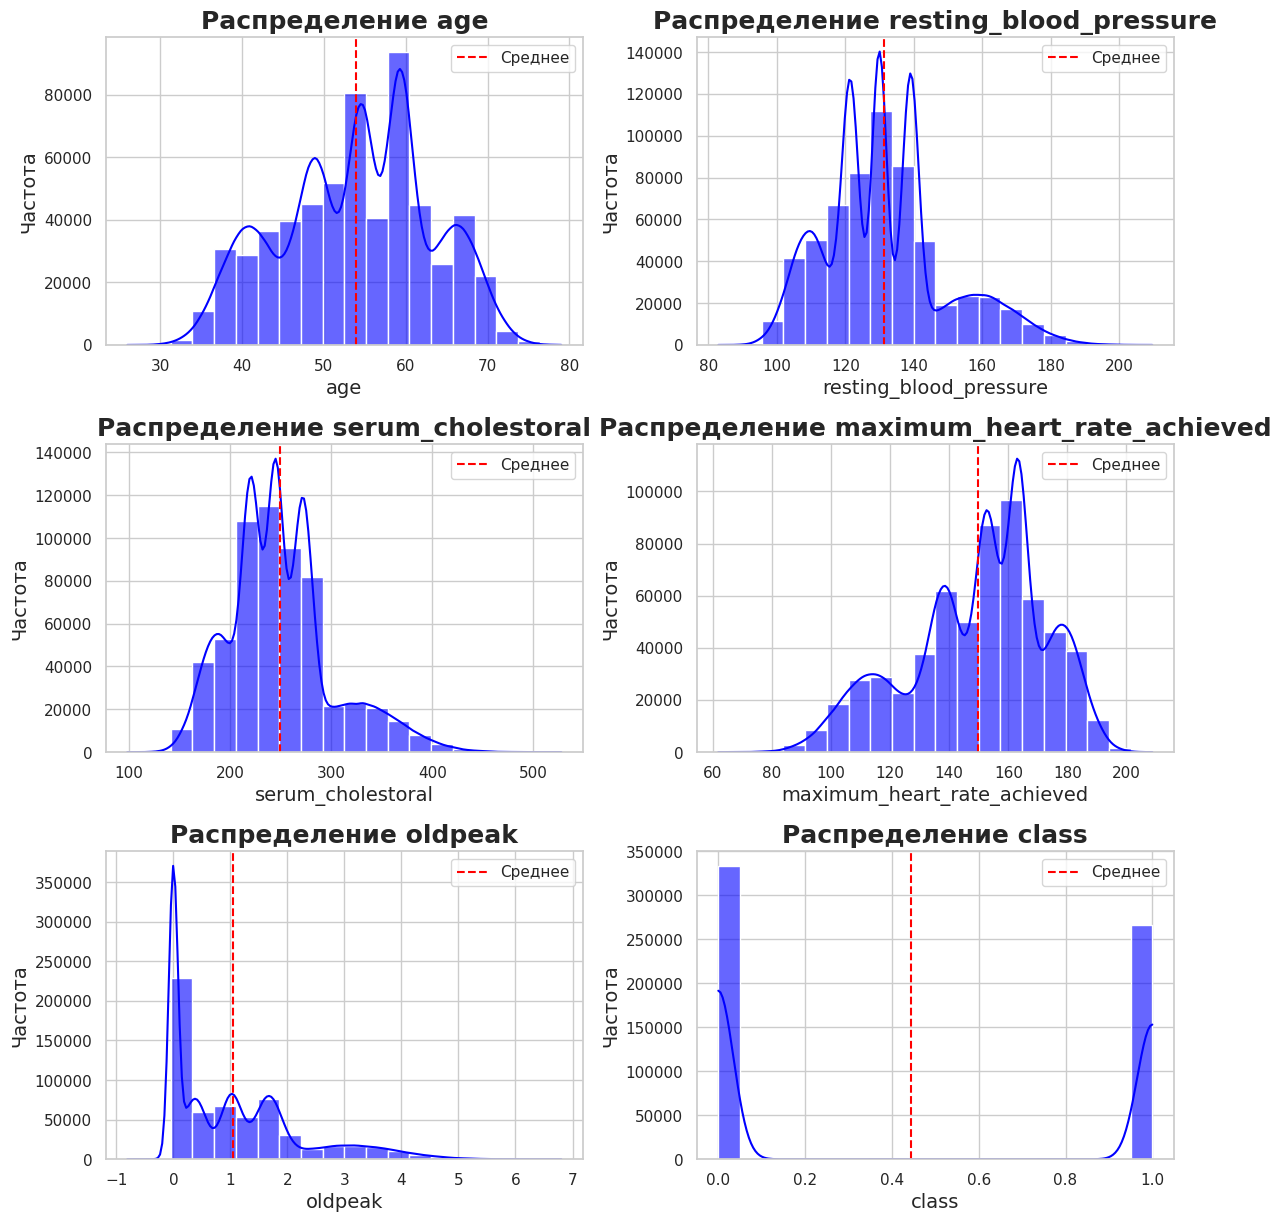

In [19]:
# Устанавливаем более привлекательный стиль для Seaborn
sns.set(style="whitegrid", palette="pastel")

# Выбираем первые 10 числовых столбцов для построения графиков
num_cols_to_plot = num_data[:10]

n_cols = 2
n_rows = (len(num_cols_to_plot) + n_cols - 1) // n_cols

# Создаем подграфики с разумным размером фигуры
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4), dpi=100)
axes = axes.flatten()

for i, column in enumerate(num_cols_to_plot):
    # Создаем гистограмму с наложением KDE (оценка ядерной плотности)
    sns.histplot(data=df, x=column, bins=20, ax=axes[i], kde=True, color='blue', alpha=0.6)

    # Добавляем заголовок и метки с улучшенной эстетикой
    axes[i].set_title(f'Распределение {column}', fontsize=18, fontweight='bold')
    axes[i].set_xlabel(column, fontsize=14)
    axes[i].set_ylabel('Частота', fontsize=14)

    # Опционально добавляем линию среднего значения
    mean_value = df[column].mean()
    axes[i].axvline(mean_value, color='red', linestyle='--', label='Среднее')
    axes[i].legend()

# Скрываем любые неиспользуемые подграфики
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

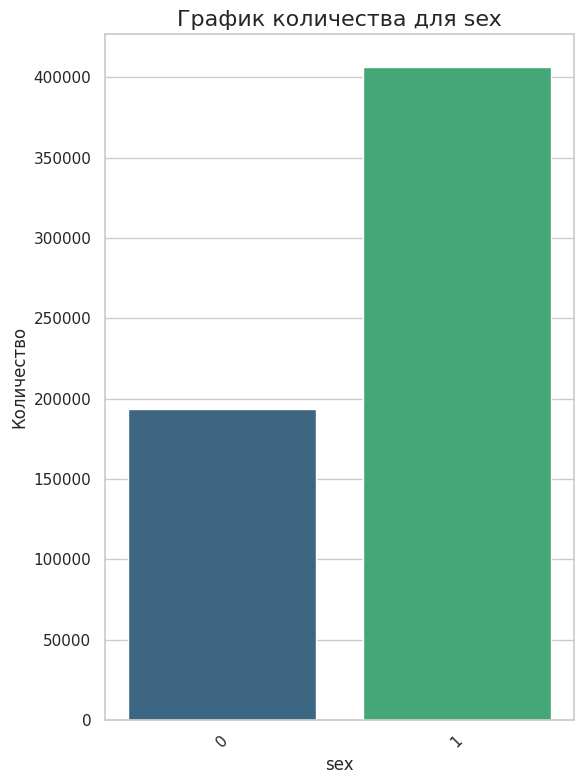

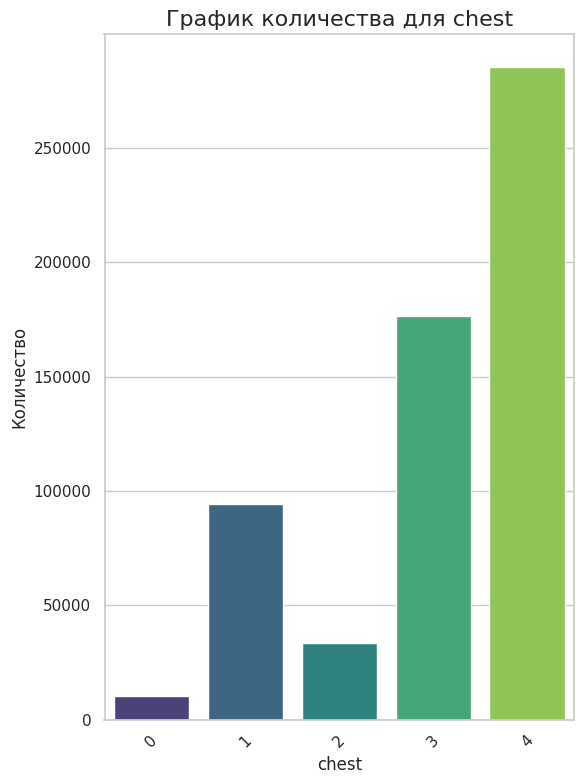

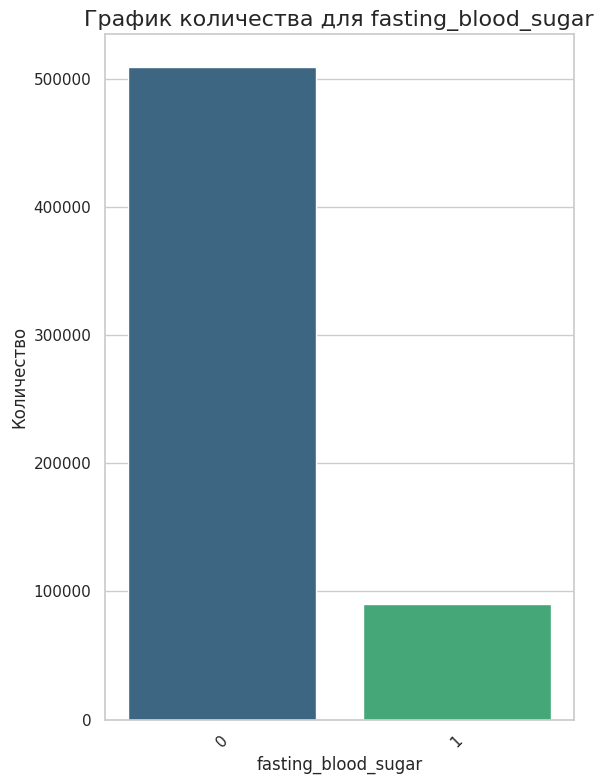

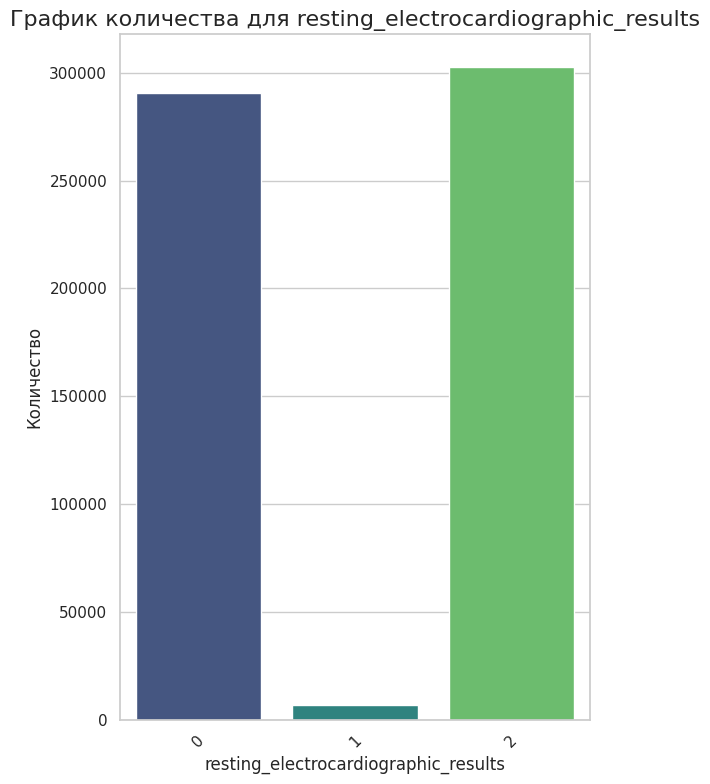

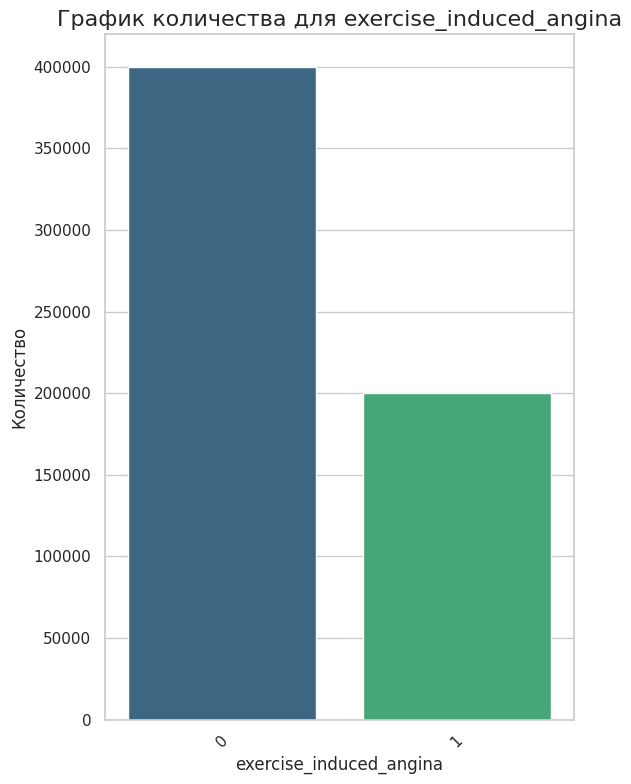

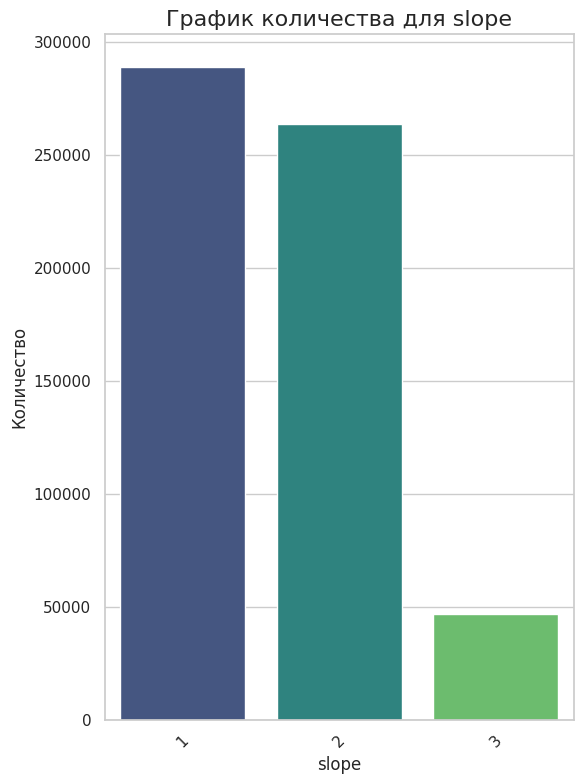

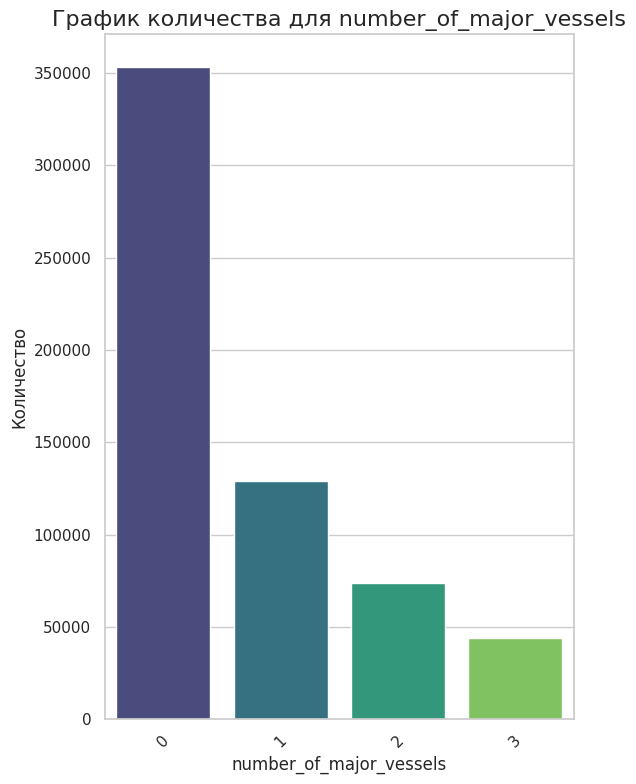

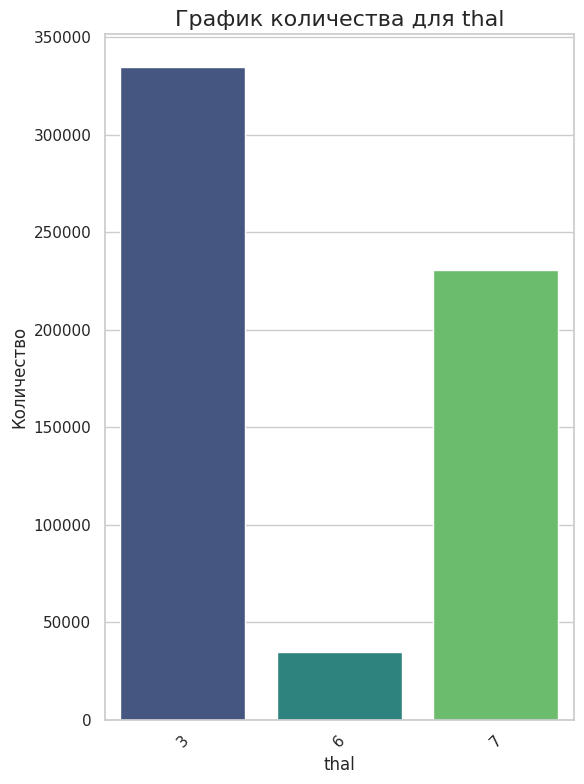

In [20]:
def plot_categorical_counts(dataframe, categorical_columns, palette='viridis', figsize=(6, 8)):
    """
    Функция для построения графиков количества для категориальных столбцов.

    :param dataframe: Pandas DataFrame с данными
    :param categorical_columns: Список категориальных столбцов
    :param palette: Палитра цветов для графиков
    :param figsize: Размер графика
    """
    # Устанавливаем стиль графиков
    sns.set(style='whitegrid')

    for column in categorical_columns:
        plt.figure(figsize=figsize)  # Устанавливаем размер графика
        sns.countplot(x=dataframe[column], palette=palette)  # Создаем график
        plt.title(f'График количества для {column}', fontsize=16)  # Заголовок
        plt.xlabel(column, fontsize=12)  # Подпись оси x
        plt.ylabel('Количество', fontsize=12)  # Подпись оси y
        plt.xticks(rotation=45)  # Поворот меток на оси x для лучшей читаемости
        plt.tight_layout()  # Автоматическая подстройка элементов графика
        plt.show()  # Отображаем график

plot_categorical_counts(df, cat_data)

In [21]:
# Проверяем все уникальные значения в категориальных столбцах
for column in cat_data:
    if column in df.columns:
        # Получаем количество значений и сортируем их
        value_counts = df[column].value_counts().sort_index()

        # Печатаем результаты в отформатированном виде
        print(f'Все уникальные значения в столбце "{column}":\n{value_counts}\n')
    else:
        print(f'Столбец "{column}" не найден в DataFrame.')

# Печатаем список категориальных столбцов
print('Категориальные столбцы:', ', '.join(cat_data))

Все уникальные значения в столбце "sex":
sex
0    193532
1    406468
Name: count, dtype: int64

Все уникальные значения в столбце "chest":
chest
0     10392
1     94092
2     33652
3    176520
4    285344
Name: count, dtype: int64

Все уникальные значения в столбце "fasting_blood_sugar":
fasting_blood_sugar
0    509546
1     90454
Name: count, dtype: int64

Все уникальные значения в столбце "resting_electrocardiographic_results":
resting_electrocardiographic_results
0    290609
1      6693
2    302698
Name: count, dtype: int64

Все уникальные значения в столбце "exercise_induced_angina":
exercise_induced_angina
0    399899
1    200101
Name: count, dtype: int64

Все уникальные значения в столбце "slope":
slope
1    289149
2    264082
3     46769
Name: count, dtype: int64

Все уникальные значения в столбце "number_of_major_vessels":
number_of_major_vessels
0    353137
1    129017
2     73773
3     44073
Name: count, dtype: int64

Все уникальные значения в столбце "thal":
thal
3    334624

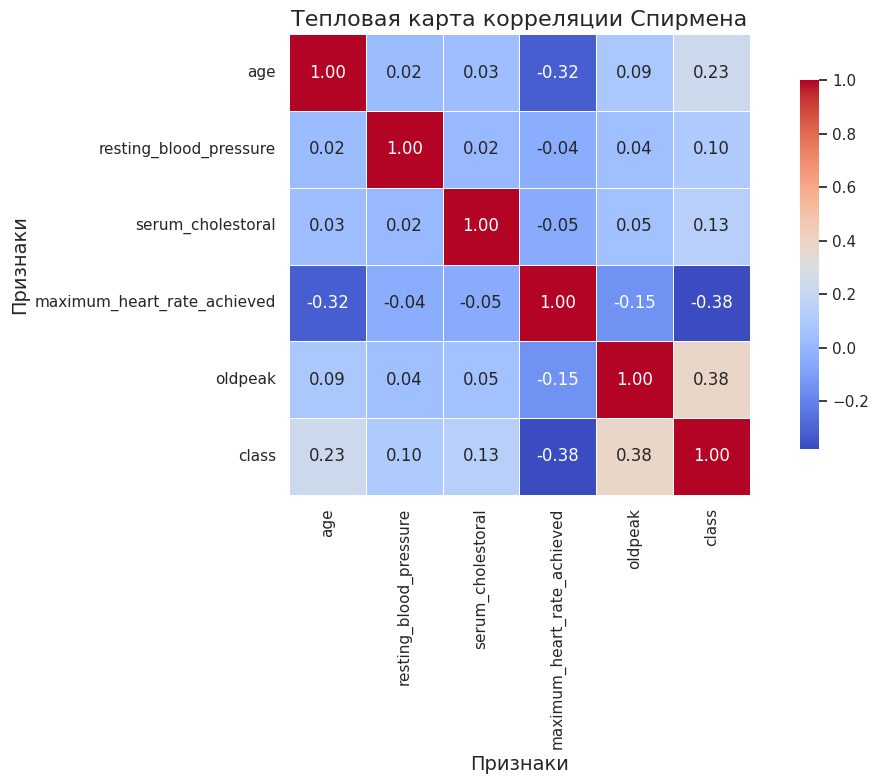

In [22]:
# Вычисляем матрицу корреляции Спирмена
corr_matrix = df.select_dtypes(include=np.number).corr(method='spearman')

# Настраиваем фигуру matplotlib
plt.figure(figsize=(12, 8))

# Создаем тепловую карту с улучшенной эстетикой
sns.heatmap(
    corr_matrix,
    annot=True,                  # Показывать коэффициенты корреляции
    cmap='coolwarm',            # Цветовая схема
    fmt='.2f',                  # Формат аннотаций до 2 десятичных знаков
    square=True,                # Сделать ячейки квадратными
    linewidths=0.5,            # Добавить линии между ячейками
    cbar_kws={"shrink": .8},   # Уменьшить цветовую шкалу для лучшего соответствия
)

# Добавляем заголовки и метки осей
plt.title('Тепловая карта корреляции Спирмена', fontsize=16)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Признаки', fontsize=14)

# Отображаем график
plt.tight_layout()             # Настроить макет, чтобы избежать обрезки меток делений
plt.show()

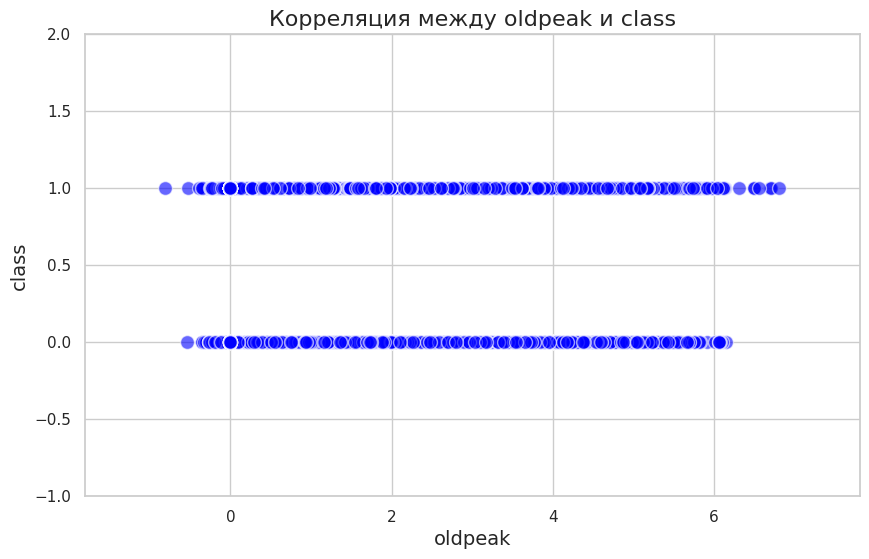

In [23]:
def create_scatter_plot(data, x_col, y_col):
    # Проверяем, существуют ли указанные столбцы в DataFrame
    if x_col not in data.columns or y_col not in data.columns:
        raise ValueError(f"Столбцы '{x_col}' или '{y_col}' не существуют в DataFrame.")

    # Извлекаем значения x и y из DataFrame
    x = data[x_col]
    y = data[y_col]

    # Создаем точечный график
    plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
    plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='w', s=100)  # Настраиваем внешний вид точек

    # Добавляем заголовки и метки
    plt.title(f'Корреляция между {x_col} и {y_col}', fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)

    # Опционально: устанавливаем пределы для осей
    plt.xlim([min(x) - 1, max(x) + 1])  # Добавляем немного отступа к пределам по оси x
    plt.ylim([min(y) - 1, max(y) + 1])  # Добавляем немного отступа к пределам по оси y

    # Показываем сетку для лучшей читаемости
    plt.grid(True)

    # Отображаем график
    plt.show()

create_scatter_plot(df, 'oldpeak', 'class')

Оценка выбросов.

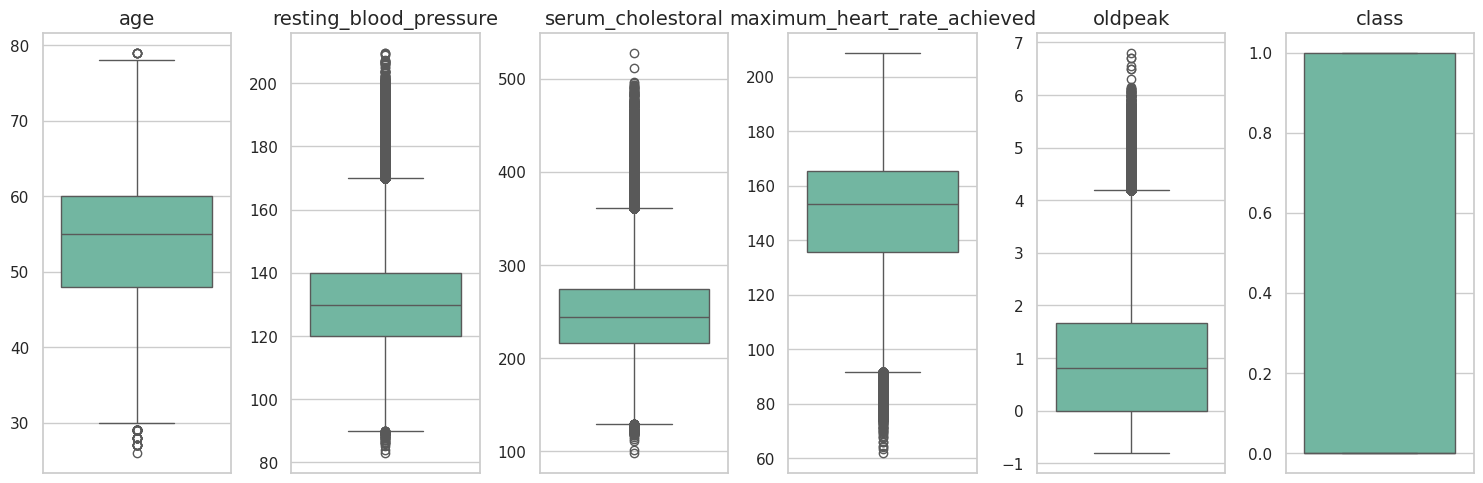

In [24]:
# Получаем названия числовых столбцов
col_num = num_data.columns

# Создаем фигуру с указанными размерами
plt.figure(figsize=(15, 5))

# Итерируемся по числовым столбцам
for idx, column in enumerate(col_num):
    plt.subplot(1, len(col_num), idx + 1)  # Создаем подграфики в одной строке
    sns.boxplot(y=df[column], palette="Set2")  # Создаем боксплот с цветовой палитрой
    plt.title(column, fontsize=14)  # Добавляем заголовок для каждого подграфика
    plt.ylabel('')
    plt.xlabel('')

# Настраиваем расположение для лучшего пространства между графиками
plt.tight_layout()
plt.show()

In [25]:
def remove_outliers_iqr(df, columns):
    """
    Удаляет выбросы из указанных колонок DataFrame с использованием метода IQR.

    :param df: Pandas DataFrame
    :param columns: Список колонок для обработки
    :return: DataFrame без выбросов
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Вычисляем границы для выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Фильтруем DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Применение функции
df = remove_outliers_iqr(df, col_num)

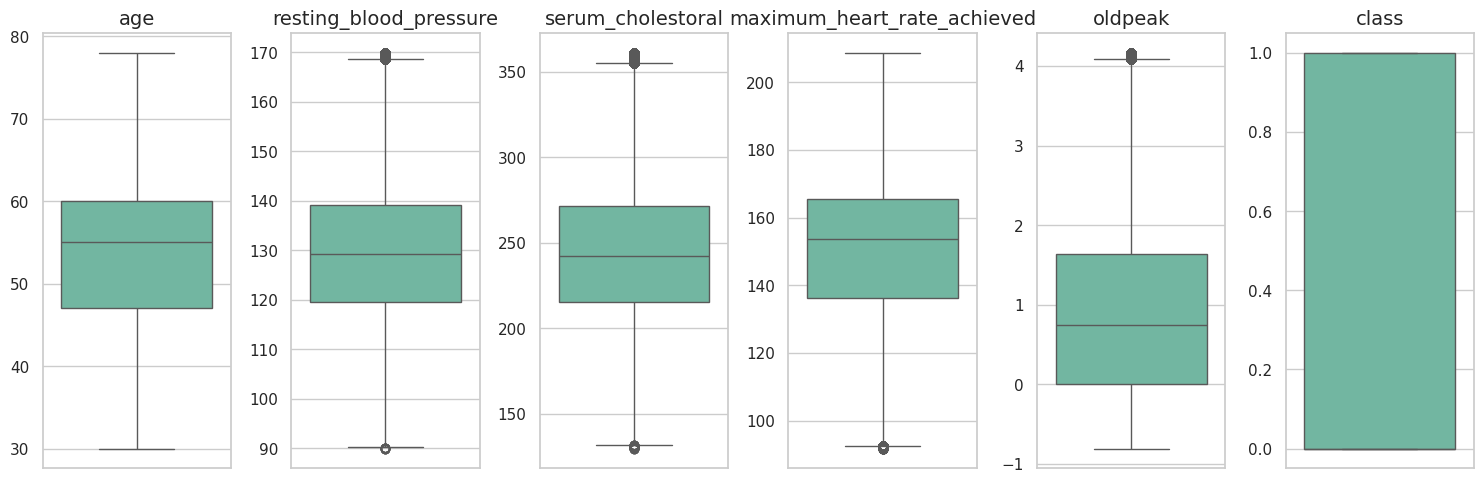

In [26]:
# Создаем фигуру с указанными размерами
plt.figure(figsize=(15, 5))

# Итерируемся по числовым столбцам
for idx, column in enumerate(col_num):
    plt.subplot(1, len(col_num), idx + 1)  # Создаем подграфики в одной строке
    sns.boxplot(y=df[column], palette="Set2")  # Создаем боксплот с цветовой палитрой
    plt.title(column, fontsize=14)  # Добавляем заголовок для каждого подграфика
    plt.ylabel('')
    plt.xlabel('')

# Настраиваем расположение для лучшего пространства между графиками
plt.tight_layout()
plt.show()

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 543161 entries, 0 to 599998
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   543161 non-null  int64  
 1   sex                                   543161 non-null  object 
 2   chest                                 543161 non-null  object 
 3   resting_blood_pressure                543161 non-null  float64
 4   serum_cholestoral                     543161 non-null  float64
 5   fasting_blood_sugar                   543161 non-null  object 
 6   resting_electrocardiographic_results  543161 non-null  object 
 7   maximum_heart_rate_achieved           543161 non-null  float64
 8   exercise_induced_angina               543161 non-null  object 
 9   oldpeak                               543161 non-null  float64
 10  slope                                 543161 non-null  object 
 11  numbe

# Обучение моделей.

Обучение и сравнение результатов трех (и более) моделей.

In [28]:
def evaluate_model(X_train, X_test, y_train, y_test, model):
    """Обучает модель и возвращает метрики производительности и матрицу ошибок."""

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba),
    }

    return metrics, conf_matrix

In [29]:
def visualize_model_performance(metrics_dict):
    """Визуализирует производительность моделей на основе метрик."""

    model_performance = {name: metrics for name, metrics in metrics_dict.items()}

    models = list(model_performance.keys())
    metrics = list(model_performance[models[0]].keys())

    fig, ax = plt.subplots(figsize=(10, 6))

    for metric_name in metrics:
        values = [model_performance[model_name][metric_name] for model_name in models]
        ax.plot(models, values, marker='o', label=metric_name)

    ax.set_xlabel('Модель')
    ax.set_ylabel('Метрики')
    ax.set_title('Производительность модели')
    ax.legend()

    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [30]:
# Подготовка данных
target = 'class'
X = df_dum.drop(target, axis=1)
y = df_dum[target]

In [31]:
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [32]:
# Масштабирование признаков
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Определение моделей
models_dict = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

In [37]:
# Словари для хранения результатов
metrics_dict = {}
conf_mat_dict = {}

In [59]:
# Обучение моделей и получение метрик
for name, model in models_dict.items():
    metrics_dict[name], conf_mat_dict[name] = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, model)


[LightGBM] [Info] Number of positive: 213209, number of negative: 266791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444185 -> initscore=-0.224193
[LightGBM] [Info] Start training from score -0.224193


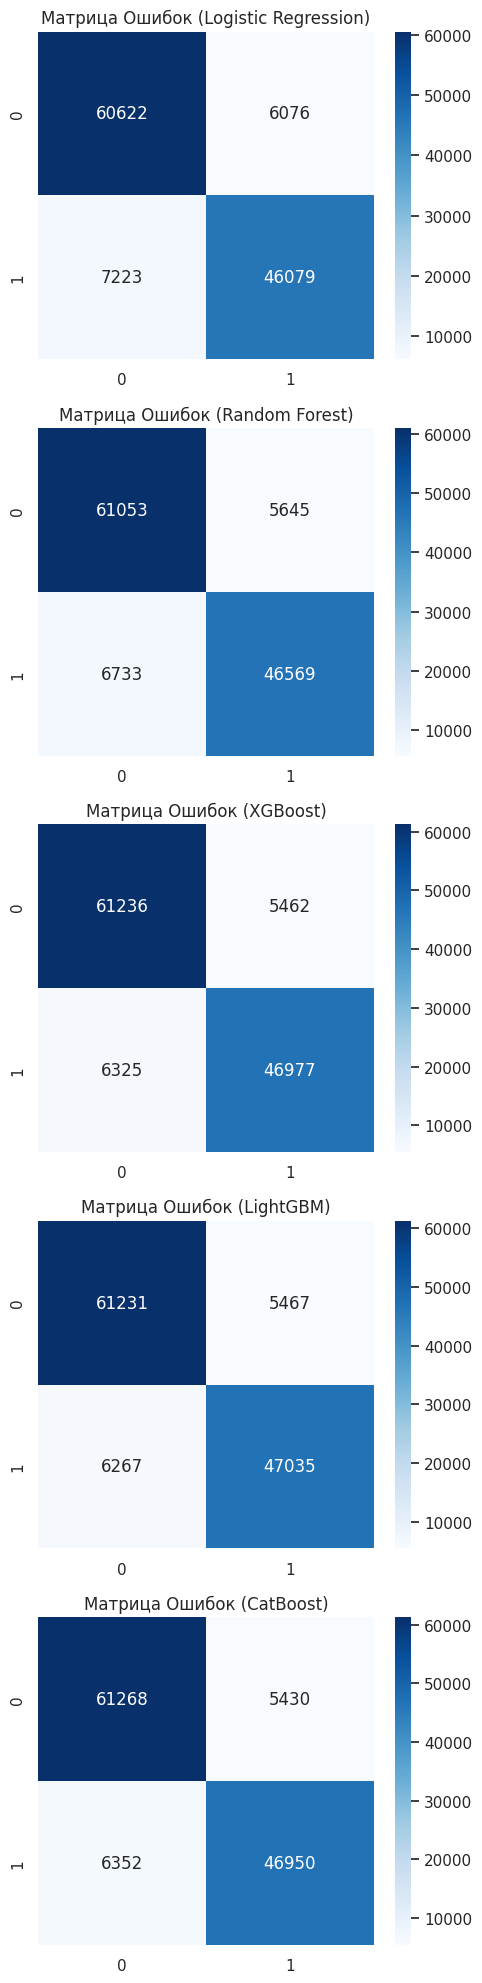

In [39]:
# Визуализация матриц ошибок
n_models = len(conf_mat_dict)
fig, axes = plt.subplots(n_models, 1, figsize=(5, n_models * 4))

for index, (name, conf_matrix) in enumerate(conf_mat_dict.items()):
    sns.heatmap(conf_matrix, annot=True, fmt="d", ax=axes[index], cmap='Blues')
    axes[index].set_title(f'Матрица Ошибок ({name})')

plt.tight_layout()
plt.show()


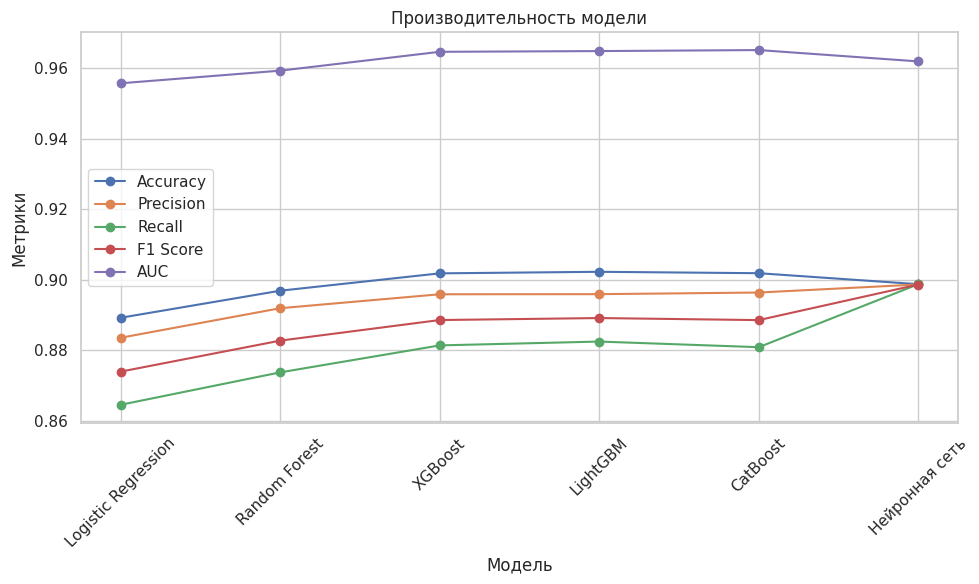

In [52]:
# Визуализация производительности моделей
visualize_model_performance(metrics_dict)

In [41]:
X_train_scaled.shape

(480000, 21)

In [58]:
# Очистка сессии
tf.keras.backend.clear_session()

In [43]:
# Создание модели нейронной сети
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),  # Первый скрытый слой
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")  # Выходной слой для бинарной классификации
])

# Вывод структуры модели
model.summary()

# Компиляция модели
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,649 (108.00 KB)

 Trainable params: 27,649 (108.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Обучение модели с ранней остановкой
early_stop = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=1024,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - auc: 0.9354 - loss: 0.3247 - val_auc: 0.9576 - val_loss: 0.2609
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - auc: 0.9582 - loss: 0.2593 - val_auc: 0.9589 - val_loss: 0.2566
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - auc: 0.9597 - loss: 0.2546 - val_auc: 0.9595 - val_loss: 0.2548
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - auc: 0.9604 - loss: 0.2524 - val_auc: 0.9598 - val_loss: 0.2538
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - auc: 0.9605 - loss: 0.2518 - val_auc: 0.9602 - val_loss: 0.2526
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - auc: 0.9606 - loss: 0.2514 - val_auc: 0.9605 - val_loss: 0.2516
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc: 0.9611 - loss: 0.2498 - val_auc: 0.9606 - val_loss: 0.2513
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc: 0.9609 - loss: 0.2503 - val_auc: 0.9606 - val_loss: 0.2514
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step -

In [47]:
# Оценка модели на тестовых данных
y_proba_nn = model.predict(X_test_scaled).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [48]:
# Вывод результатов классификации и AUC
print("Глубокая нейронная сеть:")
print(classification_report(y_test, y_pred_nn))
print(f"AUC: {roc_auc_score(y_test, y_proba_nn):.4f}")

Глубокая нейронная сеть:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     66698
           1       0.89      0.88      0.88     53302

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

AUC: 0.9619


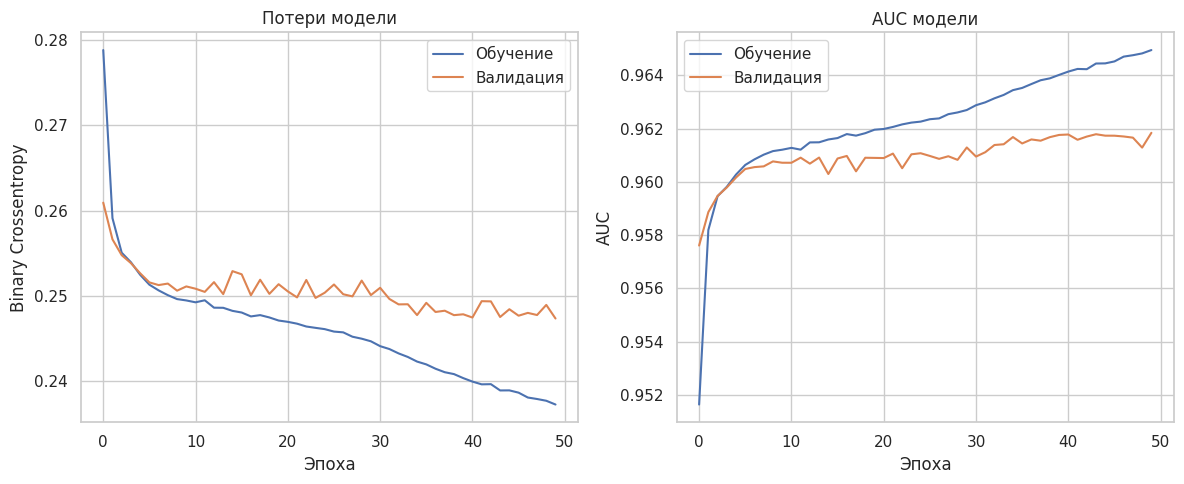

In [49]:
# Графики обучения
plt.figure(figsize=(12, 5))

# Потери модели
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Binary Crossentropy')
plt.legend()

# AUC модели
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Обучение')
plt.plot(history.history['val_auc'], label='Валидация')
plt.title('AUC модели')
plt.xlabel('Эпоха')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
# Сохранение метрик производительности модели в словаре
metrics_dict['Нейронная сеть'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn, average='weighted'),
    'Recall': recall_score(y_test, y_pred_nn, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_nn, average='weighted'),
    'AUC': roc_auc_score(y_test, y_proba_nn)
}


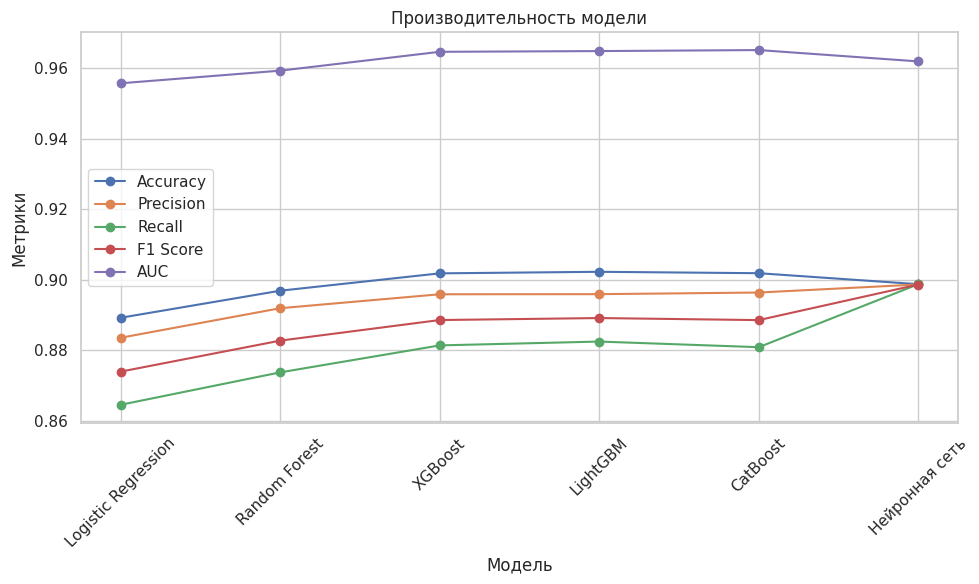

In [53]:
# Визуализация производительности модели
visualize_model_performance(metrics_dict)

In [62]:
# Настройка логирования
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Выбор лучшей модели
best_model = models_dict.get('CatBoost')

if best_model is not None:
    try:
        # Экспорт модели и скейлера с использованием контекстного менеджера
        with open('models/scaler.joblib', 'wb') as scaler_file:
            joblib.dump(scaler, scaler_file)
            logging.info("Скейлер успешно сохранен в 'models/scaler.joblib'.")

        with open('models/model.joblib', 'wb') as model_file:
            joblib.dump(best_model, model_file)
            logging.info("Модель успешно сохранена в 'models/model.joblib'.")

    except Exception as e:
        logging.error(f"Ошибка при сохранении модели или скейлера: {e}")
else:
    logging.warning("Модель CatBoost не найдена в models_dict.")


ERROR:root:Ошибка при сохранении модели или скейлера: [Errno 2] No such file or directory: 'models/scaler.joblib'
